<a href="https://colab.research.google.com/github/joreilly86/Flocode-Engineering-Insights-Substack/blob/main/essentials_strings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Strings

In [ ]:
def generate_beam_report(beam_name, length, width, height, material):
    report = f"Beam Calculation Report\n\n"
    report += f"Beam Name: {beam_name}\n"
    report += f"Dimensions:\n"
    report += f"  Length: {length:>6.1f} m\n"  # Right-align (>), width 6, 1 decimal place (.1), float (f)
    report += f"  Width:  {width:>6.1f} m\n"   # Same formatting to ensure alignment
    report += f"  Height: {height:>6.1f} m\n"  # Same formatting to ensure alignment
    report += f"Material: {material}\n"
    return report

# Usage
beam_report = generate_beam_report("B1", 5.0, 0.3, 0.4, "Concrete")
print(beam_report)

Beam Calculation Report

Beam Name: B1
Dimensions:
  Length:    5.0 m
  Width:     0.3 m
  Height:    0.4 m
Material: Concrete



In [ ]:
def calculate_beam_deflection(length, load, modulus, moment_of_inertia):
    """
    Calculate the maximum deflection of a simply supported beam.

    Parameters:
    - length (float): The length of the beam in meters.
    - load (float): The uniformly distributed load on the beam in N/m.
    - modulus (float): The modulus of elasticity of the beam material in Pa.
    - moment_of_inertia (float): The moment of inertia of the beam cross-section in m^4.

    Returns:
    - deflection (float): The maximum deflection of the beam in meters.
    """
    deflection = (5 * load * length**4) / (384 * modulus * moment_of_inertia)
    return deflection

# Usage
beam_length = 5.0
beam_load = 10000
beam_modulus = 2e11
beam_moi = 1e-4

max_deflection = calculate_beam_deflection(beam_length, beam_load, beam_modulus, beam_moi)
print(f"Maximum deflection: {max_deflection:.5f} m")

Maximum deflection: 0.00407 m


In [ ]:
import pandas as pd
import numpy as np

def clean_dataset(df):
    # Remove leading/trailing whitespace from column names
    df.columns = [col.strip() for col in df.columns]

    # Convert 'Height' column to numeric type
    df['Height'] = pd.to_numeric(df['Height'], errors='coerce')

    # Format 'Material' column to capitalize the first letter
    df['Material'] = df['Material'].str.capitalize()

    # Remove rows with missing values
    df.dropna(inplace=True)

    return df

# Create synthetic data
data = {
    'Bridge Name': ['Golden Gate ', ' Brooklyn', ' London', ' Sydney Harbor', 'Forth '],
    'Span': [1280, 1595, 283, 503, 521],
    'Width': [27, 26, 32, 49, 37],
    'Height': ['227', '84', '13', '134', '110'],
    'Material': ['Steel', 'steel', 'concrete', 'STEEL', 'steel']
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Clean the dataset
cleaned_data = clean_dataset(df)

# Print the cleaned data
print(cleaned_data)

      Bridge Name  Span  Width  Height  Material
0    Golden Gate   1280     27     227     Steel
1        Brooklyn  1595     26      84     Steel
2          London   283     32      13  Concrete
3   Sydney Harbor   503     49     134     Steel
4          Forth    521     37     110     Steel


In [ ]:
def generate_structural_report(project_name, num_floors, floor_height, beam_spacing, column_spacing):
    report = f"Structural Analysis Report\n\n"
    report += f"Project: {project_name}\n\n"

    report += "Building Specifications:\n"
    report += f"  Number of Floors: {num_floors}\n"
    report += f"  Floor Height: {floor_height} m\n"
    report += f"  Beam Spacing: {beam_spacing} m\n"
    report += f"  Column Spacing: {column_spacing} m\n\n"

    total_height = num_floors * floor_height
    report += f"Total Building Height: {total_height} m\n\n"

    report += "Structural Analysis Results:\n"
    # Perform structural analysis calculations here
    # Append the results to the report

    return report

# Usage
project_name = "ABC Tower"
num_floors = 10
floor_height = 3.5
beam_spacing = 5
column_spacing = 6

structural_report = generate_structural_report(project_name, num_floors, floor_height, beam_spacing, column_spacing)
print(structural_report)

Structural Analysis Report

Project: ABC Tower

Building Specifications:
  Number of Floors: 10
  Floor Height: 3.5 m
  Beam Spacing: 5 m
  Column Spacing: 6 m

Total Building Height: 35.0 m

Structural Analysis Results:



In [ ]:
pip install fpdf pandas matplotlib

In [ ]:
import pandas as pd

# Create synthetic data
data = {
    'Bridge Name': ['Golden Gate', 'Brooklyn', 'London', 'Sydney Harbor', 'Forth'],
    'Span': [1280, 1595, 283, 503, 521],
    'Width': [27, 26, 32, 49, 37],
    'Height': [227, 84, 13, 134, 110],
    'Material': ['Steel', 'Steel', 'Concrete', 'Steel', 'Steel']
}

# Convert to DataFrame
df = pd.DataFrame(data)


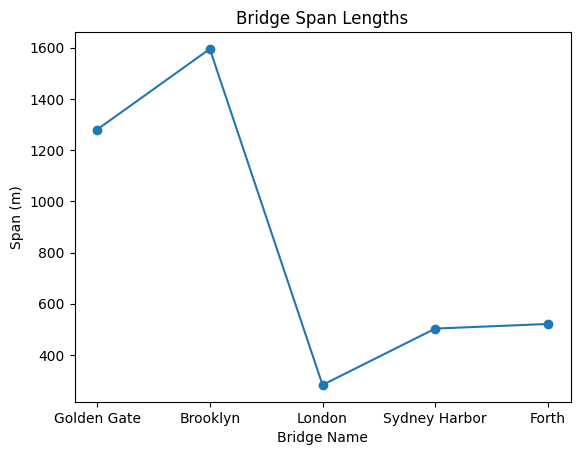

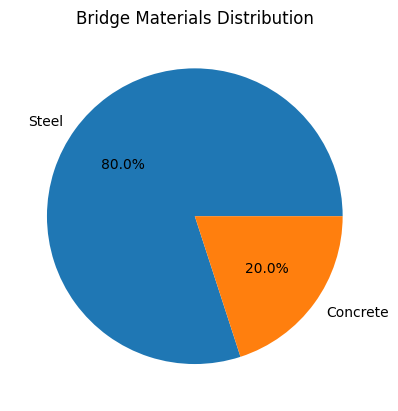

In [ ]:
import matplotlib.pyplot as plt

# Generate line chart
plt.figure()
plt.plot(df['Bridge Name'], df['Span'], marker='o')
plt.title('Bridge Span Lengths')
plt.xlabel('Bridge Name')
plt.ylabel('Span (m)')
plt.savefig('span_chart.png')

# Generate pie chart
plt.figure()
df['Material'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Bridge Materials Distribution')
plt.ylabel('')
plt.savefig('material_pie_chart.png')

In [ ]:
from fpdf import FPDF

class PDF(FPDF):
    def header(self):
        self.set_font('Arial', 'B', 12)
        self.cell(0, 10, 'Structural Analysis Report', 0, 1, 'C')
        self.ln(10)

    def footer(self):
        self.set_y(-15)
        self.set_font('Arial', 'I', 8)
        self.cell(0, 10, f'Page {self.page_no()} - flocode', 0, 0, 'C')

    def chapter_title(self, title):
        self.set_font('Arial', 'B', 12)
        self.cell(0, 10, title, 0, 1, 'L')
        self.ln(5)

    def chapter_body(self, body):
        self.set_font('Arial', '', 12)
        self.multi_cell(0, 10, body)
        self.ln()

    def add_image(self, image_path, x, y, w, h):
        self.image(image_path, x, y, w, h)
        self.ln(h + 5)

In [ ]:
def generate_structural_report(project_name, num_floors, floor_height, beam_spacing, column_spacing):
    pdf = PDF()
    pdf.add_page()

    # Title
    pdf.chapter_title('Project Details')
    project_details = f"Project: {project_name}\n\n"
    pdf.chapter_body(project_details)

    # Building Specifications
    pdf.chapter_title('Building Specifications')
    specs = (
        f"Number of Floors: {num_floors}\n"
        f"Floor Height: {floor_height} m\n"
        f"Beam Spacing: {beam_spacing} m\n"
        f"Column Spacing: {column_spacing} m\n"
    )
    total_height = num_floors * floor_height
    specs += f"\nTotal Building Height: {total_height} m\n"
    pdf.chapter_body(specs)

    # Add visualizations
    pdf.chapter_title('Visualizations')
    pdf.add_image('span_chart.png', 10, pdf.get_y(), 100, 60)
    pdf.add_image('material_pie_chart.png', 10, pdf.get_y(), 100, 60)

    # Structural Analysis Results
    pdf.chapter_title('Structural Analysis Results')
    analysis_results = "Placeholder for structural analysis results. You can add your own stuff here...\n"
    pdf.chapter_body(analysis_results)

    # Save the PDF to a file
    pdf.output('structural_analysis_report.pdf')

# Usage
project_name = "Flocode Example Tower"
num_floors = 10
floor_height = 3.5
beam_spacing = 5
column_spacing = 6

generate_structural_report(project_name, num_floors, floor_height, beam_spacing, column_spacing)